In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('laptop_data.csv')

### Data analysis

In [3]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info

<bound method DataFrame.info of       Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Disp

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Feature Engineering

#### Drop 1st column

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

df.columns


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [9]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Remove GB fron RAM and KG from Weight

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')


In [11]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### Data Analysis

### Univariate Analysis

In [14]:
import seaborn as sns

#### 1. Price

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


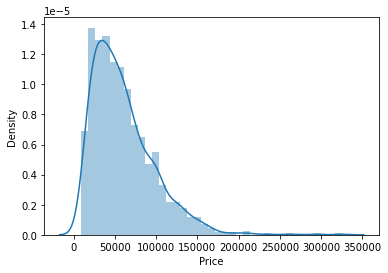

In [15]:
sns.distplot(df['Price'])

import warnings;
warnings.simplefilter('ignore')  # to ignore warnings

#### 2. Company

<AxesSubplot:>

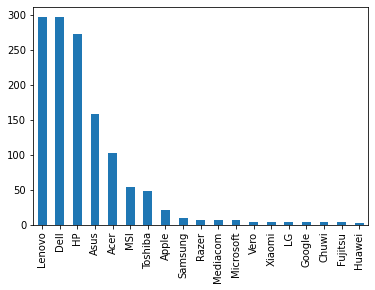

In [16]:

df['Company'].value_counts().plot(kind='bar')


#### Comparing Company and Prices

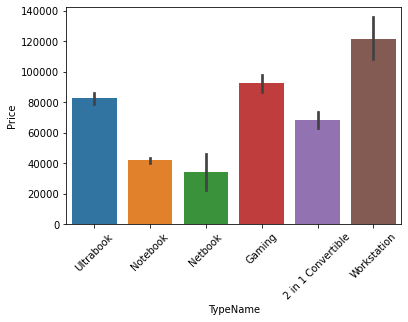

In [17]:
sns.barplot(x=df['TypeName'], y=df['Price'])     
plt.xticks(rotation='45')

plt.show()

#### 3. Type of Laptop

#### Comparing TypeName

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

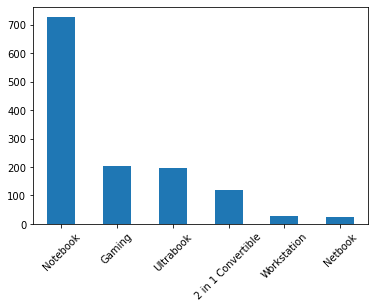

In [18]:
df['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation='45')


#### Comparing TypeName with price

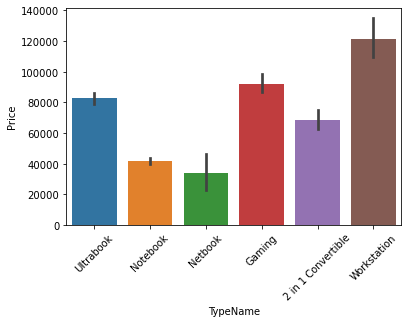

In [19]:
sns.barplot(x=df['TypeName'], y=df['Price'])     
plt.xticks(rotation='45')

plt.show()

#### 4. Size of Laptop ('Inches')

#### Checking the size of laptop


<AxesSubplot:xlabel='Inches', ylabel='Density'>

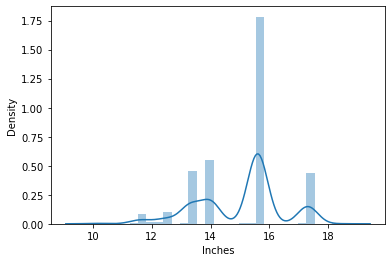

In [20]:
sns.distplot(df['Inches'])

#### Comparing Size with price

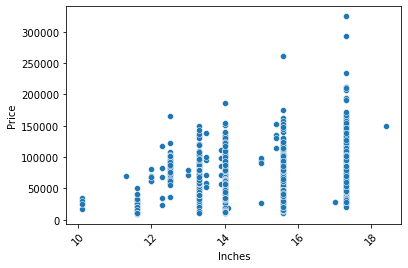

In [21]:
sns.scatterplot(x=df['Inches'], y=df['Price'])     
plt.xticks(rotation='45')

plt.show()

In [22]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### 5. ScreenResolution  ---------" Important"

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

##### We can extract these details
1. TouchScreen or not
2. Resolution
3. IPS Panel or not

###### New column for TouchScreen

In [24]:
df['Touch Screen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [26]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen
753,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,180GB SSD,Intel HD Graphics 520,Windows 10,1.70,58394.8800,0
318,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.4000,0
116,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.63,57755.5200,0
244,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.1200,1
843,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,38041.3872,0


<AxesSubplot:>

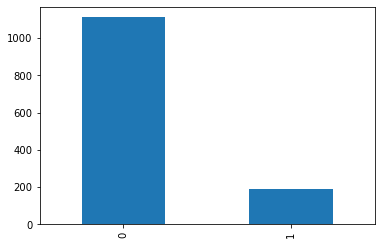

In [27]:
df['Touch Screen'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Touch Screen', ylabel='Price'>

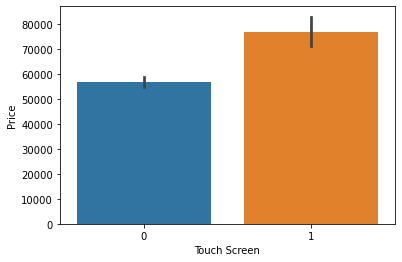

In [28]:
#Bar plot to check prices of touch screem
sns.barplot(x=df['Touch Screen'],y=df['Price'])

#####  IPS Panel New Column

In [29]:
df['IPS']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

#df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS
39,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.10,46833.1200,0,0
325,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557.7600,0,0
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.71,34578.7200,1,0
579,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0,0
685,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,149916.6000,0,0


<AxesSubplot:>

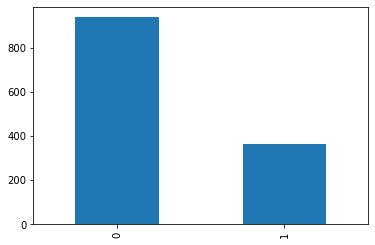

In [31]:
df['IPS'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

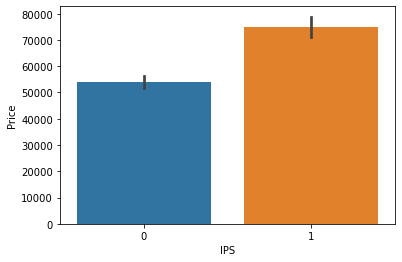

In [32]:
#Bar plot to check prices of touch screem
sns.barplot(x=df['IPS'],y=df['Price'])

####  Screen Resolution
1. 1st we will split the resolution
2. then we will clean the new columns
3. finally we will calculate the "ppi" (pixels per inches) uising formula
4. Remove "screen resolution", "inches", "x_res" and "y_res"after getfing "ppi" 

In [33]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [34]:
df['x_res'] =new[0]
df['y_res'] =new[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
#Filter the x_res Column and extract the pixels

df['x_res'] = df['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])



In [37]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


#### Calculate PPI

ppi = [{(x_res)^2 X (y_res)^2}^0.5)/inches)]

In [38]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touch Screen      1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [40]:
df.corr()['Price'] # Checking Correlation

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch Screen    0.191226
IPS             0.252208
x_res           0.556529
y_res           0.552809
Name: Price, dtype: float64

In [41]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2)**0.5)/df['Inches'])

In [42]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,492872.180451
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,155977.443609
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,236376.923077
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,538714.285714
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,492872.180451


In [43]:
df.corr()['Price'] # Checking Correlation

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch Screen    0.191226
IPS             0.252208
x_res           0.556529
y_res           0.552809
ppi             0.480376
Name: Price, dtype: float64

#### Removing the "ScreenResolution", "x_res" and "y_res" and "Inhes" columns

In [44]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [45]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451


### CPU Column

In [46]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Atom x5-Z8300 1.44GHz               1
Samsung Cortex A72&A53 2.0GHz             1
Intel Celeron Dual Core N3350 2.0GHz      1
Intel Core M M3-6Y30 0.9GHz               1
Intel Core i7 2.7GHz                      1
Name: Cpu, Length: 118, dtype: int64

##### Spliting the words and creating a new column from 'Cpu'

In [47]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:x.split()[0:3])

In [48]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,"[Intel, Core, i5]"


In [49]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [50]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5


In [51]:
df['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD Ryzen 1700                3
AMD A9-Series 9410            3
Intel Pentium Dual            3
Intel Atom X5-Z8350           2
AMD E-Series 7110             2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
AMD A9-Series A9-9420         2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD A10-Series 9620P          2
Intel Atom x5-Z8300           1
AMD Ryzen 1600                1
AMD E-Series 9000e            1
AMD A4-Series 7210            1
AMD E-Series 6110             1
Intel At

##### differentiating the "CPU Name"

In [52]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [53]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [54]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i7'),
  Text(1, 0, 'Intel Core i5'),
  Text(2, 0, 'Other Intel Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'AMD Processor')])

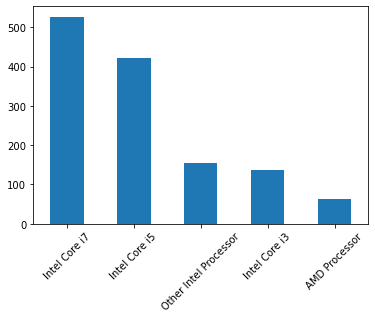

In [55]:
df['Cpu brand'].value_counts().plot(kind='bar')
plt.xticks(rotation='45')


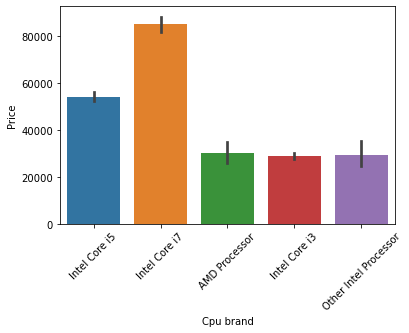

In [56]:
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation='45')
plt.show()

##### Drop the other columns 

In [57]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [58]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5


### RAM

<AxesSubplot:>

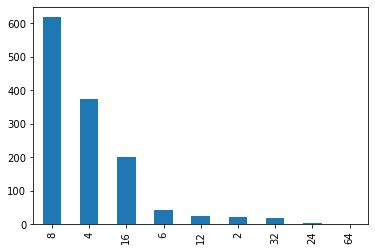

In [59]:
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

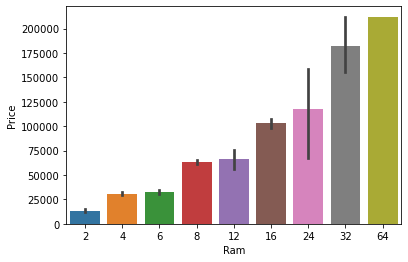

In [60]:
#Bar plot to check prices of touch screem
sns.barplot(x=df['Ram'],y=df['Price'])

### Memory Column

In [61]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB SSD +  256GB SSD             1
5

#### There are mainly 4 different typre is 'Memory' mainly SSD, HDD, FLASH and HYBRID

In [62]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
"""---------------------------------------------------------"""
"""--------------------------------------------------------"""
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [63]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,0,0


In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
126,HP,Notebook,8,1000 HDD,Intel UHD Graphics 620,Windows 10,1.63,43263.3600,0,0,263391.428571,Intel Core i5,1000,0,0,0
71,Dell,Ultrabook,8,256 SSD,AMD Radeon 530,Windows 10,1.40,50882.4000,0,1,277254.135338,Intel Core i7,0,256,0,0
178,Lenovo,Notebook,8,128 SSD + 1000 HDD,AMD R17M-M1-70,Windows 10,1.90,43316.6400,0,0,236376.923077,Intel Core i5,1000,128,0,0
57,Asus,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,2.00,31232.2032,0,0,119661.794872,Intel Core i5,0,256,0,0
195,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.9200,0,1,213149.132948,Intel Core i5,1000,0,0,0


#### Remove 'Memory' Column

In [65]:
df.drop(columns=['Memory'],inplace=True)


In [66]:
df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,0,0


In [67]:
df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touch Screen     0.191226
IPS              0.252208
ppi              0.480376
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [68]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace = True)

In [69]:
df.head(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256


### GPU COlumn

In [70]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Iris Pro Graphics      1
Nvidia GeForce 920           1
Intel Graphics 620           1
AMD FirePro W5130M           1
Nvidia GeForce 960M          1
Name: Gpu, Length: 110, dtype: int64

In [71]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [72]:
df.head(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,Intel


In [73]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [74]:
df[df['Gpu Brand'] == 'ARM']  # Identifing the single GPU

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,468422.764228,AMD Processor,0,0,ARM


In [75]:
df = df[df['Gpu Brand'] != 'ARM']   #Removing the single GPU

In [76]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

<AxesSubplot:xlabel='Gpu Brand', ylabel='Price'>

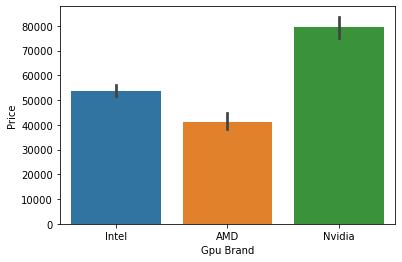

In [77]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'])

In [78]:
df.drop(columns=['Gpu'],inplace=True) #Removing old 'GPU column'


In [79]:
df.head(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,Intel


### Op Sys Column

In [80]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

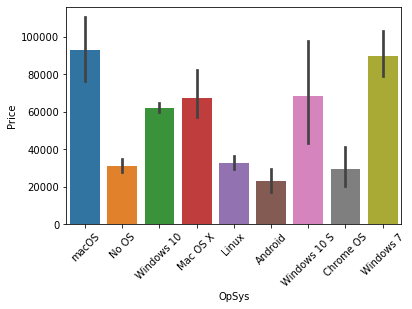

In [81]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation ='45')

In [82]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    if inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return "Other/Linux/No OS"

In [83]:
df["os"] = df['OpSys'].apply(cat_os)

In [84]:
df.head(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac


In [85]:
df.drop(columns=['OpSys'],inplace=True) #Removing old 'OpSys'


In [86]:
df.head(5)

,Company,TypeName,Ram,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:xlabel='os', ylabel='Price'>

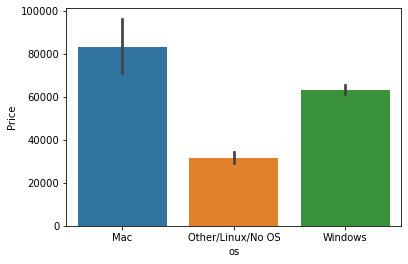

In [87]:
sns.barplot(x=df['os'], y=df['Price'])

### Last column 'Weight'

<AxesSubplot:xlabel='Weight', ylabel='Density'>

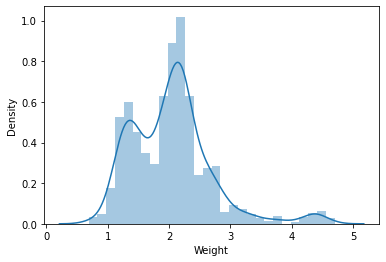

In [88]:
sns.distplot(df['Weight'])


<AxesSubplot:xlabel='Weight', ylabel='Price'>

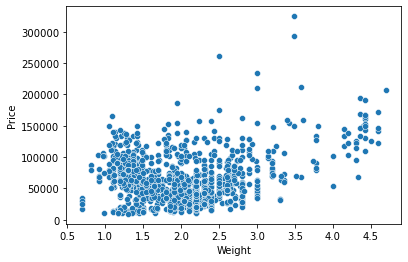

In [89]:
sns.scatterplot(x=df['Weight'], y=df['Price'])


In [90]:
df.corr()['Price']


Ram             0.742905
Weight          0.209867
Price           1.000000
Touch Screen    0.192917
IPS             0.253320
ppi             0.481351
HDD            -0.096891
SSD             0.670660
Name: Price, dtype: float64

<AxesSubplot:>

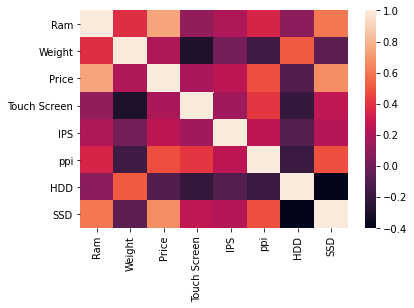

In [91]:
sns.heatmap(df.corr())

## Our target column 'Price' is skewed we will use log function and convert that to 'Normal'
## we have to remember to use log again while extracting values for y

<AxesSubplot:xlabel='Price', ylabel='Density'>

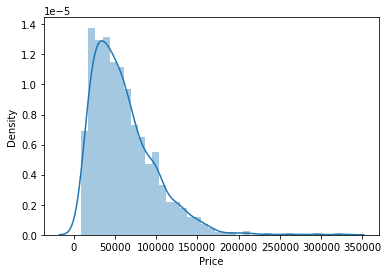

In [92]:
sns.distplot((df['Price']))

<AxesSubplot:xlabel='Price', ylabel='Density'>

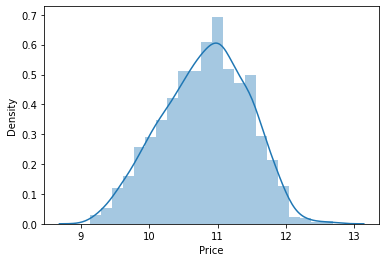

In [93]:
sns.distplot(np.log(df['Price']))

In [94]:
X= df.drop(columns=['Price'])
y = np.log(df['Price'])

In [95]:
X

,Company,TypeName,Ram,Weight,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,236376.923077,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,263391.428571,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,770060.150376,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,133337.428571,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,119661.794872,Intel Core i7,1000,0,AMD,Windows


In [96]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Model Building
##### Company, TypeName, Cpu brand, Gpu Brand and os all are catagorical columns, we have to apply OneHotEncoding to them

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15, random_state=2)

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [99]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])  #Because catagorical dat is in X columns
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8022217250421481
MAE 0.2123065853394927


In [101]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': r2_score(y_test,y_pred)},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222


## Ridge Regression

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8082751958455425
MAE 0.209511379621633


In [103]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 'accuracy': [r2_score(y_test,y_pred)]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275


## Lasso Regression

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8020291050542883
MAE 0.21259609768695212


In [105]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression'], 'accuracy': [r2_score(y_test,y_pred)]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029


## KNN

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7948212875403781
MAE 0.2006118296615495


In [107]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'accuracy': [r2_score(y_test,y_pred)]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821


## Decision Tree


In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.831010878018529
MAE 0.1920312297656639


In [109]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [r2_score(y_test,y_pred)]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011


## SVM

In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5568347983844117
MAE 0.32101776146617983


In [111]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'accuracy': [r2_score(y_test,y_pred)]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835


## Random Forest

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8836490219321596
MAE 0.16090554644039926


In [113]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [r2_score(y_test,y_pred)]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649


## ExtraTrees

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8785722217555401
MAE 0.15914162564140322


In [115]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['ExtraTrees'], 'accuracy': [r2_score(y_test,y_pred)]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649
8,ExtraTrees,0.878572


## AdaBoost

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.785731856749702
MAE 0.2314182375583499


In [117]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'accuracy': [r2_score(y_test,y_pred)]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649
8,ExtraTrees,0.878572
9,AdaBoost,0.785732


## Gradient Boost


In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8787035051556126
MAE 0.16144132860543972


In [119]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [r2_score(y_test,y_pred)]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649
8,ExtraTrees,0.878572
9,AdaBoost,0.785732
10,Gradient Boost,0.878704


## XgBoost

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.87707698499373
MAE 0.1650204176160687


In [121]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['XG Boost'], 'accuracy': [r2_score(y_test,y_pred)]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649
8,ExtraTrees,0.878572
9,AdaBoost,0.785732
10,Gradient Boost,0.878704


## Voting Regressor

In [122]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8897208285534258
MAE 0.1582754739105239


In [123]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Voting Regressor'], 'accuracy': [r2_score(y_test,y_pred)]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649
8,ExtraTrees,0.878572
9,AdaBoost,0.785732
10,Gradient Boost,0.878704


## Stacking

In [124]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8815138684252625
MAE 0.1653731326434122


In [125]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Stacking'], 'accuracy': [r2_score(y_test,y_pred)]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Linear Regression,0.802222
2,Ridge Regression,0.808275
3,Lasso Regression,0.802029
4,KNN,0.794821
5,Decision Tree,0.831011
6,SVM,0.556835
7,Random Forest,0.883649
8,ExtraTrees,0.878572
9,AdaBoost,0.785732
10,Gradient Boost,0.878704


In [127]:
results.columns

Index(['Method', 'accuracy'], dtype='object')

In [133]:
sorted_results = results.sort_values(["accuracy"], ascending=False)

In [134]:
sorted_results

,Method,accuracy
12,Voting Regressor,0.889721
7,Random Forest,0.883649
13,Stacking,0.881514
10,Gradient Boost,0.878704
8,ExtraTrees,0.878572
11,XG Boost,0.877077
5,Decision Tree,0.831011
2,Ridge Regression,0.808275
1,Linear Regression,0.802222
3,Lasso Regression,0.802029


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Voting Regressor'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Stacking'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'ExtraTrees'),
  Text(5, 0, 'XG Boost'),
  Text(6, 0, 'Decision Tree'),
  Text(7, 0, 'Ridge Regression'),
  Text(8, 0, 'Linear Regression'),
  Text(9, 0, 'Lasso Regression'),
  Text(10, 0, 'KNN'),
  Text(11, 0, 'AdaBoost'),
  Text(12, 0, 'SVM')])

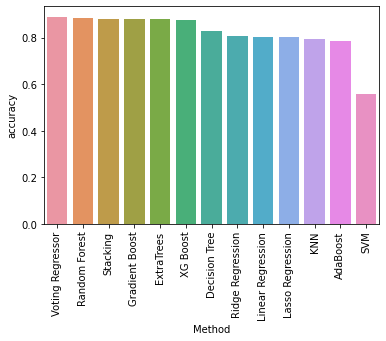

In [137]:
sns.barplot(x=sorted_results['Method'], y=sorted_results['accuracy'])
plt.xticks(rotation='90')

## Exporting the Model

In [139]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [140]:
df

,Company,TypeName,Ram,Weight,Price,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,236376.923077,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,263391.428571,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,770060.150376,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,133337.428571,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,119661.794872,Intel Core i7,1000,0,AMD,Windows


In [141]:
X_train

,Company,TypeName,Ram,Weight,Touch Screen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,119661.794872,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,236376.923077,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,160924.482759,Other Intel Processor,0,0,Intel,Other/Linux/No OS
1020,Dell,2 in 1 Convertible,4,2.08,1,1,236376.923077,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,236376.923077,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,119661.794872,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,236376.923077,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,119661.794872,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,119661.794872,Intel Core i3,2000,0,Nvidia,Other/Linux/No OS
